# Phân tích dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/GGDrive/')

Drive already mounted at /content/GGDrive/; to attempt to forcibly remount, call drive.mount("/content/GGDrive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import warnings
warnings.filterwarnings("ignore")
import string
import nltk
from nltk.corpus import stopwords

## Bước 1: Chuẩn bị dữ liệu

In [ ]:
df=pd.read_csv('/content/GGDrive/MyDrive/Data Analysis/Project/Tweets.csv')
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


## Bước 2: Xử lý dữ liệu

In [ ]:
# Kiểm tra các giá trị thiếu trong các cột
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# Hiển thị các cột của dataframe
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Hiển thị thông tin của bộ dữu liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Danh sách các cột cần xóa
columns_to_drop = ['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence', 'airline_sentiment_gold',
                   'negativereason_gold', 'tweet_created', 'tweet_location', 'user_timezone', 'airline_sentiment', 'negativereason', 'tweet_coord']

# Xóa các cột không cần thiết từ DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Hiển thị DataFrame sau khi đã xóa các cột không cần thiết
df.head(10)

,airline,name,retweet_count,text
0,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.
1,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...
2,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...
4,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...
5,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
6,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."
7,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...
8,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ..."


## Bước 3: Làm sạch dữ liệu

### Bước 3.1 : Xử lý chuỗi (symbol, stopword, punctuations)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
df['airline']=df['airline'].apply(lambda x: x.split(',,,')[0])

In [ ]:
# Loại bỏ tên các hãng bay khỏi các bình luận trong cột 'text'
def remove_airline_names_from_text(row):
    airline_name = row['airline'].lower().replace(" ", "")
    text = row['text'].lower()
    text = text.replace("@" + airline_name, "")  # Loại bỏ tên hãng bay
    return text

# Áp dụng hàm loại bỏ tên hãng bay cho cột 'text' trong DataFrame
df['text'] = df.apply(remove_airline_names_from_text, axis=1)

In [ ]:
for index,text in enumerate(df['text'][35:40]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
 nice rt : vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
Comment 2:
  moodlighting is the only way to fly! best experience ever! cool and calming. 💜✈ #moodlitmonday
Comment 3:
  @freddieawards done and done! best airline around, hands down!
Comment 4:
  when can i book my flight to hawaii??
Comment 5:
  your chat support is not working on your site: http://t.co/vhp2gtdwpk


In [ ]:
# Tải danh sách stopwords của tiếng Anh từ thư viện nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Hàm xử lý chuỗi: loại bỏ dấu câu, stopwords và chuyển về chữ thường
def clean_text(text):
    # Loại bỏ dấu câu
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Chuyển về chữ thường
    text = text.lower()
    # Loại bỏ stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
# Áp dụng hàm xử lý chuỗi vào cột 'text' của DataFrame
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
# Hiển thị 10 dòng đầu của DataFrame sau khi đã xử lý chuỗi
print(df['clean_text'].head(20))

0                                         dhepburn said
1         plus youve added commercials experience tacky
2          didnt today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay 30 flight seats didnt play...
6     yes nearly every time fly vx “ear worm” won’t ...
7     really missed prime opportunity men without ha...
8                                        well didnt…but
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11    lt3 pretty graphics much better minimal iconog...
12    great deal already thinking 2nd trip australia...
13    virginmedia im flying fabulous seductive skies...
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week couldnt fully sit s

In [ ]:
df['text']=df['text'].apply(lambda x: x.split(',,,')[0])

In [ ]:
for index,text in enumerate(df['text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 nice rt : vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
Review 2:
  moodlighting is the only way to fly! best experience ever! cool and calming. 💜✈ #moodlitmonday
Review 3:
  @freddieawards done and done! best airline around, hands down!
Review 4:
  when can i book my flight to hawaii??
Review 5:
  your chat support is not working on your site: http://t.co/vhp2gtdwpk


### Bước 3.2 : Xử lý các dạng từ. (Expand contractions, Lowercase the reviews, Remove digits and words containing digits, Remove punctuations)

In [ ]:
# Chuyển các từ viết tắt thành các từ đầy đủ

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['text']=df['text'].apply(lambda x:expand_contractions(x))

**Lowercase the reviews**

In [ ]:
# Chuyển các từ in hoa thành chữ thường
df['clean_text']=df['text'].apply(lambda x: x.lower())

**Remove digits and words containing digits**

In [ ]:
# Loại bỏ chữ số và từ có chứa chữ số
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

**Remove Punctuations**

In [ ]:
# Loại bỏ tất cả các dấu câu
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# Loại bỏ tất cả các khoảng trống dư thừa
df['clean_text']=df['clean_text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
import re

# Tạo biểu thức chính quy để tìm icon Unicode
icon_regex = r'[\U00010000-\U0010FFFF]'

# Hàm để lọc ra tất cả các icon Unicode từ một chuỗi
def find_icons(text):
    return re.findall(icon_regex, text)

# Áp dụng hàm cho cột 'cleaned' trong DataFrame
df['icons'] = df['clean_text'].apply(find_icons)

In [ ]:
df.head()

,airline,name,retweet_count,text,clean_text,icons
0,Virgin America,cairdin,0,what @dhepburn said.,what dhepburn said,[]
1,Virgin America,jnardino,0,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[]
2,Virgin America,yvonnalynn,0,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[]
3,Virgin America,jnardino,0,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[]
4,Virgin America,jnardino,0,and it is a really big bad thing about it,and it is a really big bad thing about it,[]


In [ ]:
# Hàm để loại bỏ các icon Unicode từ một chuỗi
def remove_icons(text):
    return re.sub(icon_regex, '', text)

# Áp dụng hàm loại bỏ icon cho cột 'cleaned' trong DataFrame
df['clean_text'] = df['clean_text'].apply(remove_icons)

In [ ]:
for index,text in enumerate(df['clean_text'][45:60]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
  im elevategold for a good reason you rock
Comment 2:
  dream httptco httptco
Comment 3:
  wow this just blew my mind
Comment 4:
  ladygaga carrieunderwood after last night tribute soundofmusic ladygaga i think carrieunderwood agree
Comment 5:
  ladygaga carrieunderwood all were entertaining
Comment 6:
  is flight on it is way was supposed to take off minutes ago website still shows on time not in flight thanks
Comment 7:
  ladygaga carrieunderwood julie andrews all the way though ladygaga was very impressive no to carrieunderwood
Comment 8:
  wish you flew out of atlanta soon
Comment 9:
  ladygaga carrieunderwood julie andrews hands down
Comment 10:
  will flights be leaving dallas for la on february 
Comment 11:
  hi im so excited about your lgagtdal deal but ive been trying book since last week amp the page never loads thx
Comment 12:
  you know it need it on my spotify stat guiltypleasures
Comment 13:
  ladygaga carrieunderwood im lady gaga she is amazing 
Comment 14:
 

In [ ]:
df.head()

,airline,name,retweet_count,text,clean_text,icons
0,Virgin America,cairdin,0,what @dhepburn said.,what dhepburn said,[]
1,Virgin America,jnardino,0,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[]
2,Virgin America,yvonnalynn,0,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[]
3,Virgin America,jnardino,0,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[]
4,Virgin America,jnardino,0,and it is a really big bad thing about it,and it is a really big bad thing about it,[]


## Bước 4: Xử lý stopword và lemmatization (Document Term Matrix)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Download stopwords và wordnet từ nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Khởi tạo WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Khởi tạo CountVectorizer để tạo Document Term Matrix
vectorizer = CountVectorizer()

In [ ]:
# Xây dựng stopword list
stop_words = set(stopwords.words('english'))

In [ ]:
# Hàm xử lý văn bản: loại bỏ stopword và lemmatization
def process_text(text):
    # Tách từ
    tokens = word_tokenize(text)
    # Loại bỏ stopword và lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Áp dụng hàm xử lý văn bản cho trường cleaned
df['cleaned'] = df['clean_text'].apply(process_text)

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['clean_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['airline','lemmatized']].groupby(by='airline').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
airline,
American,air consider continue point program receive pe...
Delta,jetblue yesterday way ewr fll takeoff \n wheel...
Southwest,air wait hit hour air m happy cancel flight fl...
US Airways,well time flight friday need change worried ...
United,thank thank take care mr happy customer ...


In [ ]:
df_cleaned = df.copy()

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zipper,zkatcher,zombie,zone,zoom,zrh,zrhairport,zuke,zurich,zurichnew
airline,,,,,,,,,,,,,,,,,,,,,
American,167,0,1,1,0,1,1,1,1,2,...,0,0,0,2,1,0,0,0,1,1
Delta,3,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
Southwest,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


**Bước 5: Khám phá dữ liệu**

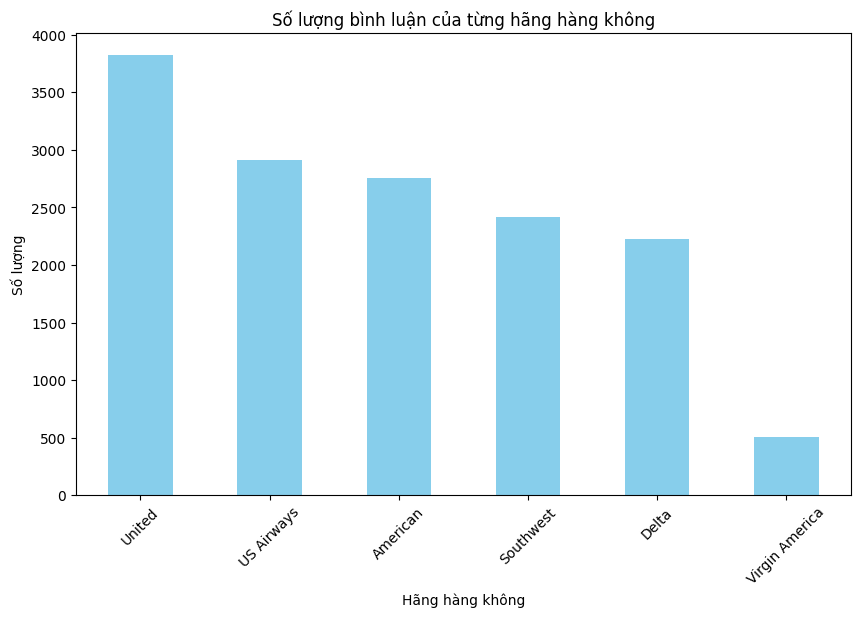

In [ ]:
# Tính tần suất xuất hiện của từng hãng hàng không trong các bình luận
airline_frequency = df['airline'].value_counts()

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
airline_frequency.plot(kind='bar', color='skyblue')
plt.title('Số lượng bình luận của từng hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_cleaned.head()

,airline,name,retweet_count,text,clean_text,icons,cleaned,lemmatized
0,Virgin America,cairdin,0,what @dhepburn said.,what dhepburn said,[],dhepburn said,dhepburn say
1,Virgin America,jnardino,0,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[],plus added commercial experience tacky,plus add commercial experience tacky
2,Virgin America,yvonnalynn,0,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[],today must mean need take another trip,today mean need trip
3,Virgin America,jnardino,0,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[],really aggressive blast obnoxious entertainmen...,aggressive blast obnoxious entertainment gue...
4,Virgin America,jnardino,0,and it is a really big bad thing about it,and it is a really big bad thing about it,[],really big bad thing,big bad thing


In [ ]:
import nltk
# paste this at the start of code
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter

stop=set(stopwords.words('english'))

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = word_tokenize(column)
    return [w for w in tokens if w.isalpha()]


# df_cleaned['cleaned_token'] = df_cleaned['cl'].apply(word_tokenize)
df_cleaned['cleaned_token'] = df_cleaned.apply(lambda x: tokenize(x['cleaned']), axis=1)
df_cleaned.head()

,airline,name,retweet_count,text,clean_text,icons,cleaned,lemmatized,cleaned_token
0,Virgin America,cairdin,0,what @dhepburn said.,what dhepburn said,[],dhepburn said,dhepburn say,"[dhepburn, said]"
1,Virgin America,jnardino,0,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[],plus added commercial experience tacky,plus add commercial experience tacky,"[plus, added, commercial, experience, tacky]"
2,Virgin America,yvonnalynn,0,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[],today must mean need take another trip,today mean need trip,"[today, must, mean, need, take, another, trip]"
3,Virgin America,jnardino,0,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[],really aggressive blast obnoxious entertainmen...,aggressive blast obnoxious entertainment gue...,"[really, aggressive, blast, obnoxious, enterta..."
4,Virgin America,jnardino,0,and it is a really big bad thing about it,and it is a really big bad thing about it,[],really big bad thing,big bad thing,"[really, big, bad, thing]"


In [ ]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

df_cleaned['cleaned_token'] = df_cleaned['cleaned_token'].apply(lambda x: extract_ngrams(x, 2))
df_cleaned.head()

,airline,name,retweet_count,text,clean_text,icons,cleaned,lemmatized,cleaned_token
0,Virgin America,cairdin,0,what @dhepburn said.,what dhepburn said,[],dhepburn said,dhepburn say,[dhepburn said]
1,Virgin America,jnardino,0,plus you have added commercials to the experi...,plus you have added commercials to the experi...,[],plus added commercial experience tacky,plus add commercial experience tacky,"[plus added, added commercial, commercial expe..."
2,Virgin America,yvonnalynn,0,i did not today... must mean i need to take a...,i did not today must mean i need to take anot...,[],today must mean need take another trip,today mean need trip,"[today must, must mean, mean need, need take, ..."
3,Virgin America,jnardino,0,"it is really aggressive to blast obnoxious ""e...",it is really aggressive to blast obnoxious en...,[],really aggressive blast obnoxious entertainmen...,aggressive blast obnoxious entertainment gue...,"[really aggressive, aggressive blast, blast ob..."
4,Virgin America,jnardino,0,and it is a really big bad thing about it,and it is a really big bad thing about it,[],really big bad thing,big bad thing,"[really big, big bad, bad thing]"


In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list: all_words += word
    return all_words

def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending =False)
    word_count_sorted
    return word_count_sorted[:10]

reviews = df_cleaned['cleaned_token']
reviews_words = combine_words(reviews)
reviews_words[:600]

['dhepburn said',
 'plus added',
 'added commercial',
 'commercial experience',
 'experience tacky',
 'today must',
 'must mean',
 'mean need',
 'need take',
 'take another',
 'another trip',
 'really aggressive',
 'aggressive blast',
 'blast obnoxious',
 'obnoxious entertainment',
 'entertainment guest',
 'guest face',
 'face amp',
 'amp little',
 'little recourse',
 'really big',
 'big bad',
 'bad thing',
 'seriously would',
 'would pay',
 'pay flight',
 'flight seat',
 'seat playing',
 'playing really',
 'really bad',
 'bad thing',
 'thing flying',
 'flying va',
 'yes nearly',
 'nearly every',
 'every time',
 'time fly',
 'fly vx',
 'vx ear',
 'ear worm',
 'worm go',
 'go away',
 'really missed',
 'missed prime',
 'prime opportunity',
 'opportunity men',
 'men without',
 'without hat',
 'hat parody',
 'parody httpstco',
 'amazing arrived',
 'arrived hour',
 'hour early',
 'early good',
 'know suicide',
 'suicide second',
 'second leading',
 'leading cause',
 'cause death',
 'death a

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
470,customer service,564
611,cancelled flightled,498
549,late flight,245
884,flight cancelled,239
1108,cancelled flighted,219


11. Các cụm từ nào được nhắc đến nhiều nhất trong các bình luận?

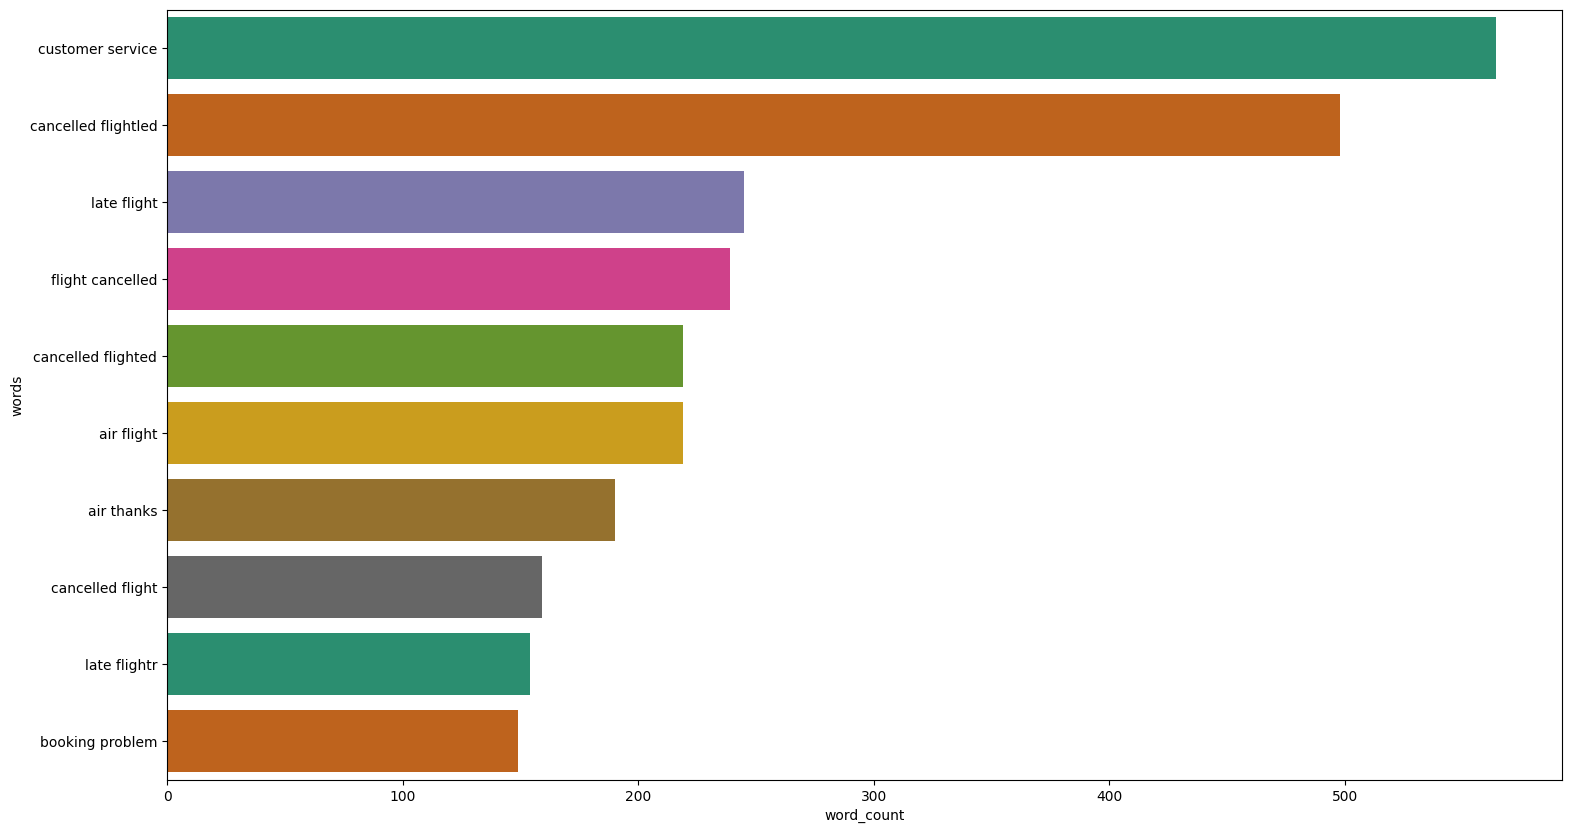

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.barplot(data=reviews_topword_count, y=reviews_topword_count['words'], x=reviews_topword_count['word_count'], palette='Dark2')
plt.show()

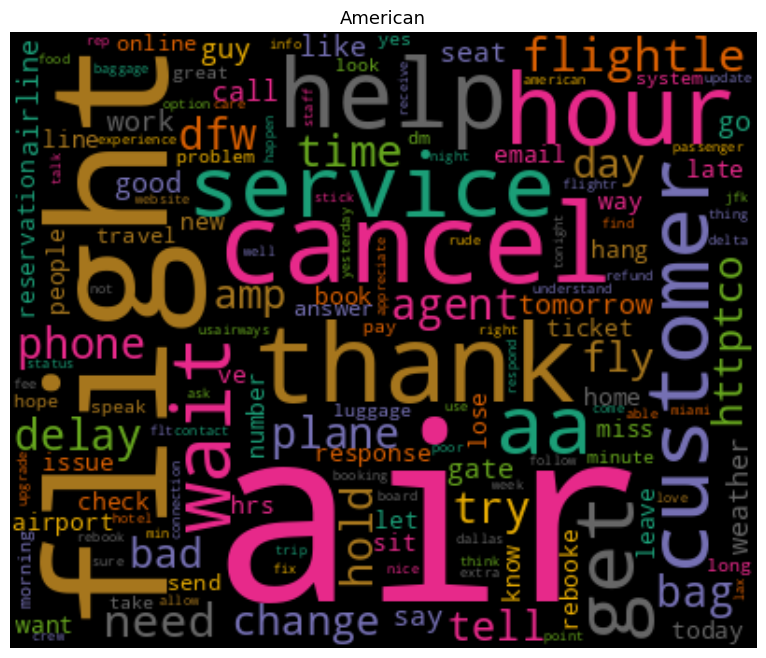

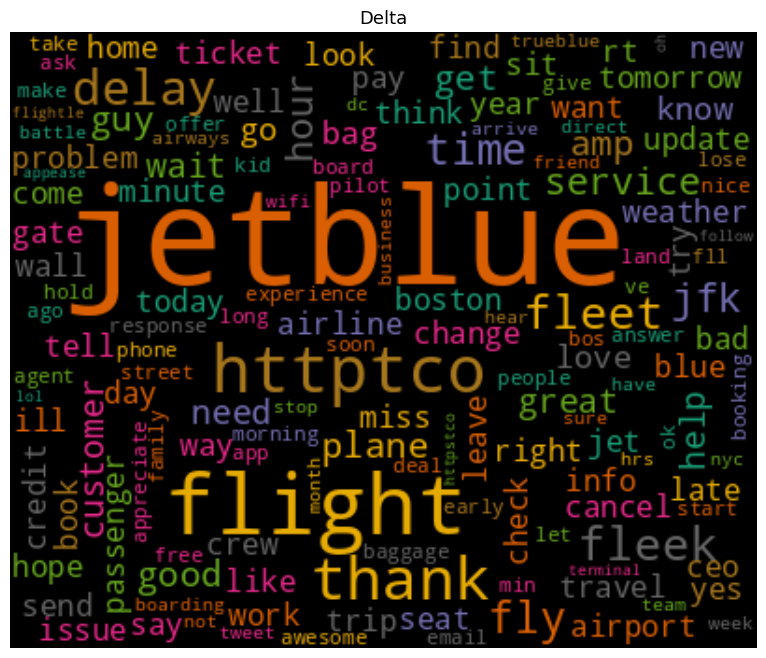

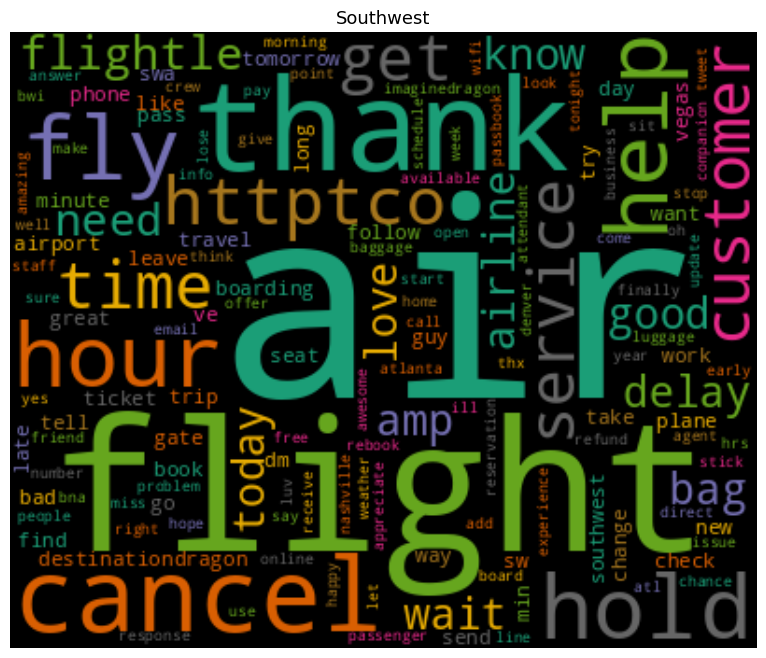

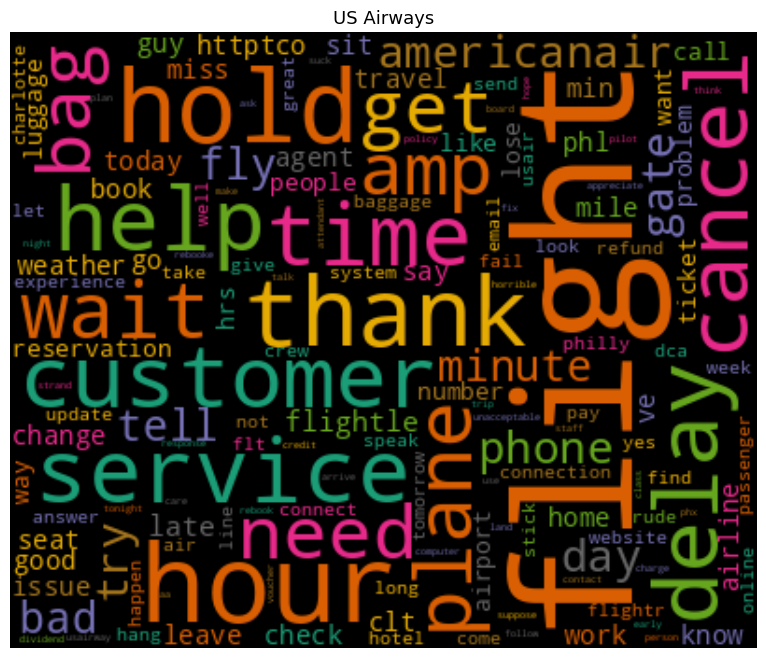

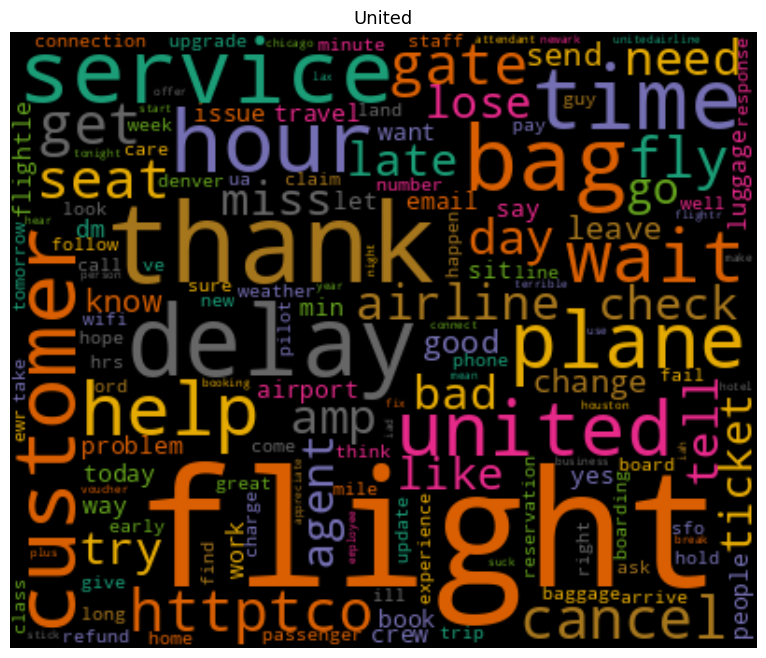

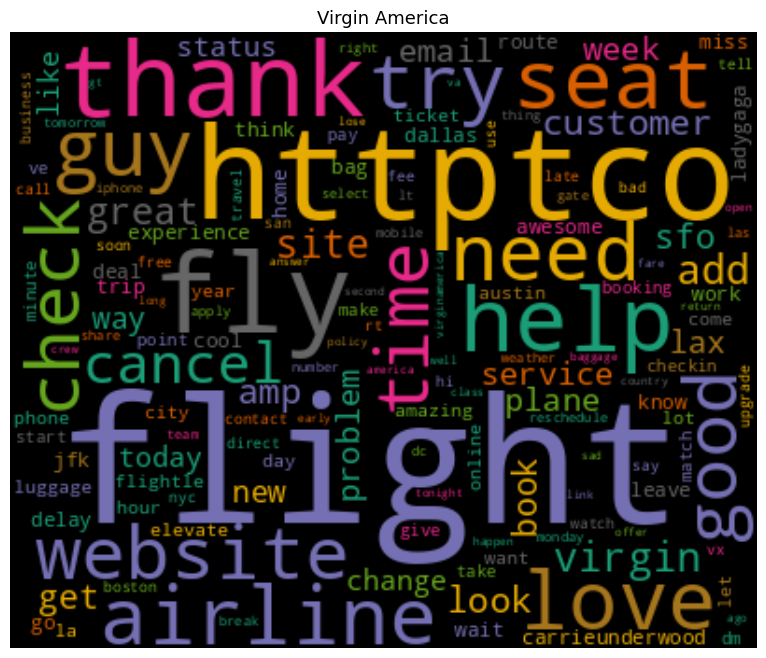

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index, airline	in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[airline].sort_values(ascending=False),airline)

12. Mỗi hãng máy bay nhận được bao nhiêu số lượng bình luận?

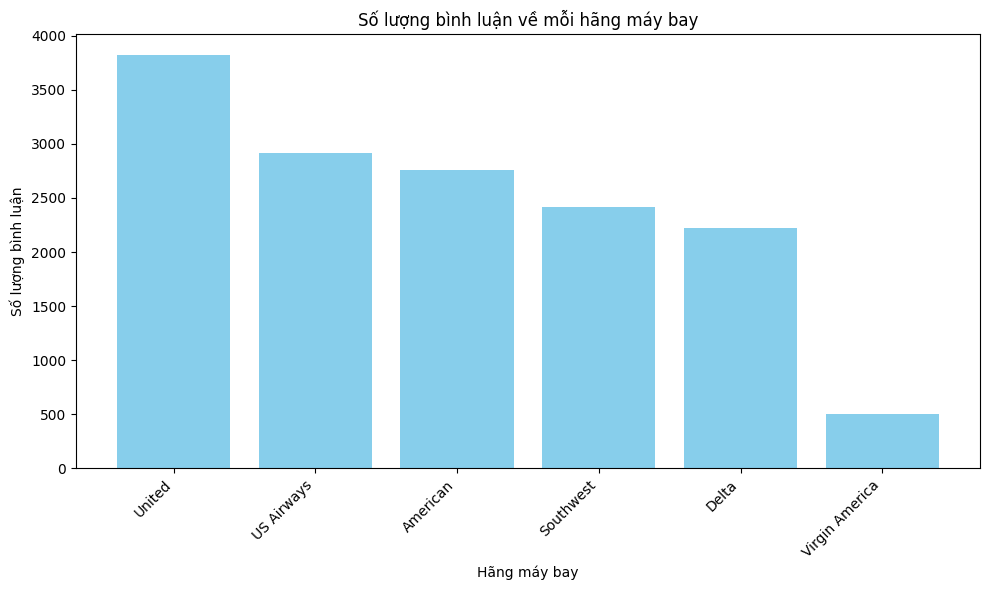

In [ ]:
# Dữ liệu số lượng bình luận về mỗi hãng máy bay
airlines = comment_counts.index
comments = comment_counts.values

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(airlines, comments, color='skyblue')
plt.title('Số lượng bình luận về mỗi hãng máy bay')
plt.xlabel('Hãng máy bay')
plt.ylabel('Số lượng bình luận')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

13. Các bình luận nào có số lần Retweet cao?

In [ ]:
# Sắp xếp DataFrame theo cột retweet_count và lấy top 10
top_10_retweeted = df.sort_values(by='retweet_count', ascending=False).head(10)

# In ra số lần retweet và bình luận tương ứng
for index, row in top_10_retweeted.iterrows():
    print(f"Số lần retweet: {row['retweet_count']}")
    print(f"Bình luận: {row['text']}")
    print()

Số lần retweet: 44
Bình luận:  5 hr flight delay and a delay when we land . is that even real life ? get me off this plane , i wanna go home 👠👠👠 (3 heel clicks)

Số lần retweet: 32
Bình luận:  of course never again tho . thanks for tweetin ur concern but not doin anythin to fix what happened. i'll choose wiser next time

Số lần retweet: 31
Bình luận: stop. using.this.word. if. you are. a. company. rt @jetblue: our fleet is on fleek. http://t.co/fd2tnyctrb

Số lần retweet: 28
Bình luận:  with this livery back in the day. http://t.co/eeqwvammiy

Số lần retweet: 22
Bình luận: air beautiful day in seattle! http://t.co/iqu0ppvq2s

Số lần retweet: 22
Bình luận: can you not? rt @jetblue our fleet is on fleek. http://t.co/413gial0yl

Số lần retweet: 18
Bình luận: just in case you needed confirmation that "on fleek" is dead &amp; gone. rt @jetblue: our fleet is on fleek. http://t.co/g4o6yx7tmj

Số lần retweet: 15
Bình luận: x____x rt @jetblue: our fleet is on fleek. http://t.co/y39yzdpbvu

Số l

14. Tần suất xuất hiện của các từ khóa phổ biến như "delay" (trễ chuyến), "customer service" (dịch vụ khách hàng) giữa các hãng bay là bao nhiêu?

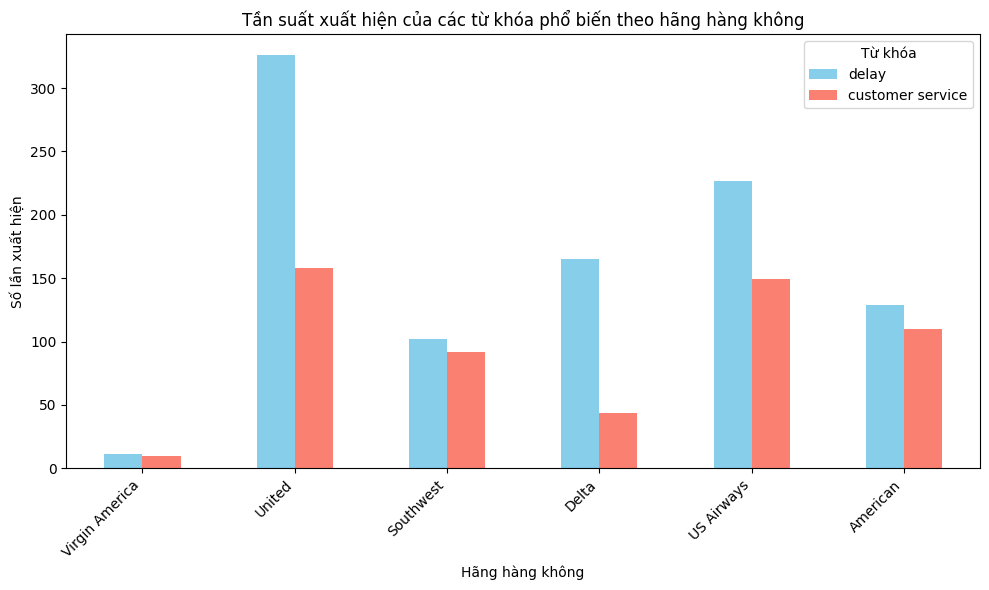

In [ ]:
# Danh sách các hãng hàng không cần so sánh
airlines = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']

# Danh sách các từ khóa cần so sánh
keywords = ['delay', 'customer service']

# Tạo DataFrame để lưu kết quả
results = pd.DataFrame(columns=keywords, index=airlines)

# Tính tần suất xuất hiện của từng từ khóa cho mỗi hãng hàng không
for airline in airlines:
    airline_data = df[df['airline'] == airline]
    for keyword in keywords:
        keyword_count = airline_data['text'].str.contains(keyword, case=False).sum()
        results.loc[airline, keyword] = keyword_count

# Vẽ biểu đồ cột
results.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Tần suất xuất hiện của các từ khóa phổ biến theo hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Từ khóa')
plt.tight_layout()
plt.show()

15. Tần suất xuất hiện của các từ khóa phổ biến như "thank", "good", "great" giữa các hãng bay là bao nhiêu?

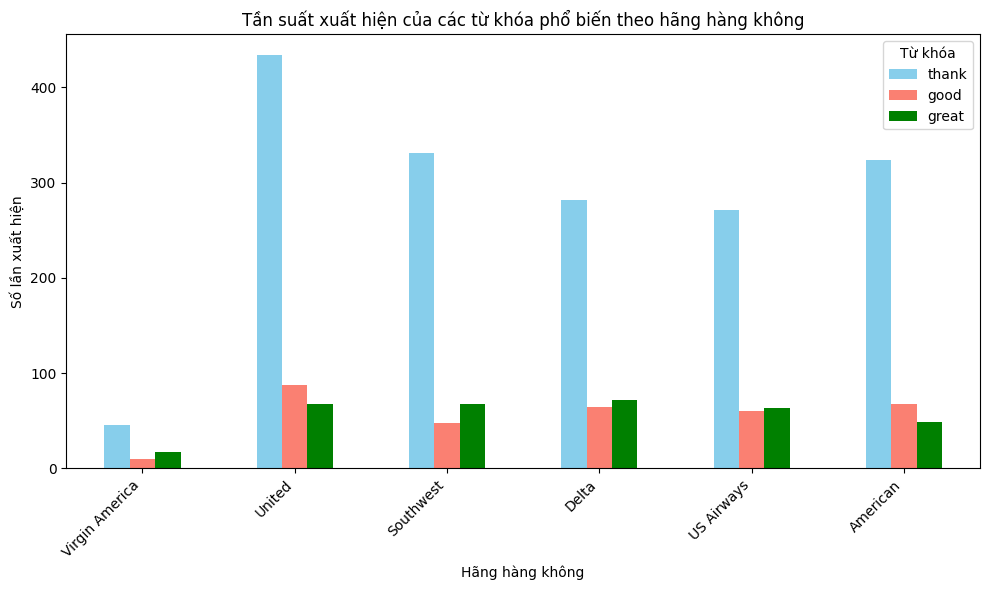

In [ ]:
# Danh sách các hãng hàng không cần so sánh
airlines = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']

# Danh sách các từ khóa cần so sánh
keywords = ['thank', 'good', 'great']

# Tạo DataFrame để lưu kết quả
results = pd.DataFrame(columns=keywords, index=airlines)

# Tính tần suất xuất hiện của từng từ khóa cho mỗi hãng hàng không
for airline in airlines:
    airline_data = df[df['airline'] == airline]
    for keyword in keywords:
        keyword_count = airline_data['text'].str.contains(keyword, case=False).sum()
        results.loc[airline, keyword] = keyword_count

# Vẽ biểu đồ cột
results.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'green'])
plt.title('Tần suất xuất hiện của các từ khóa phổ biến theo hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Từ khóa')
plt.tight_layout()
plt.show()

16. Tần suất xuất hiện của các từ khóa phổ biến như "bad", "poor", "terrile" giữa các hãng bay là bao nhiêu?

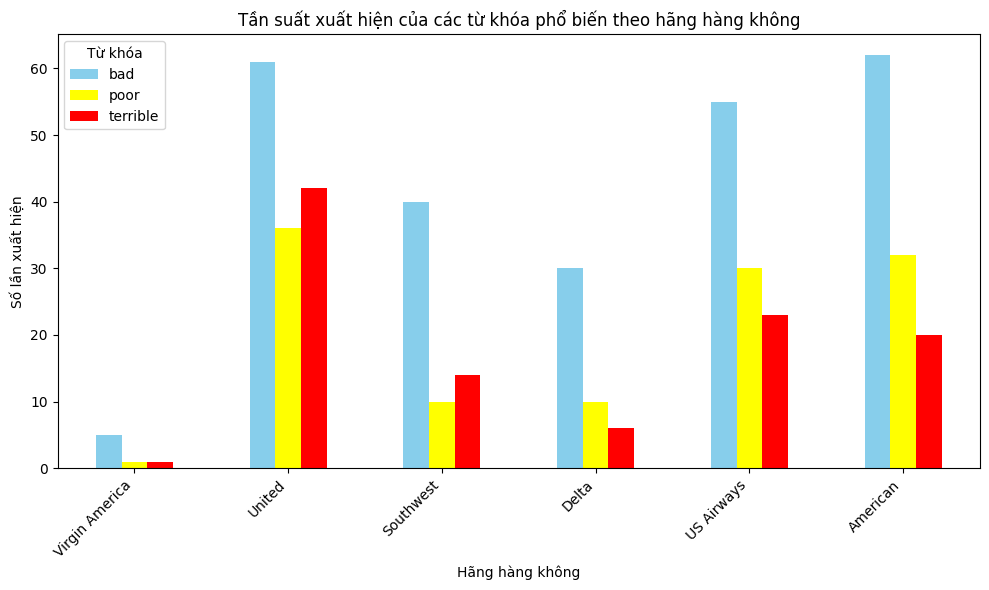

In [ ]:
# Danh sách các hãng hàng không cần so sánh
airlines = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']

# Danh sách các từ khóa cần so sánh
keywords = ['bad', 'poor', 'terrible']

# Tạo DataFrame để lưu kết quả
results = pd.DataFrame(columns=keywords, index=airlines)

# Tính tần suất xuất hiện của từng từ khóa cho mỗi hãng hàng không
for airline in airlines:
    airline_data = df[df['airline'] == airline]
    for keyword in keywords:
        keyword_count = airline_data['text'].str.contains(keyword, case=False).sum()
        results.loc[airline, keyword] = keyword_count

# Vẽ biểu đồ cột
results.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'yellow', 'red'])
plt.title('Tần suất xuất hiện của các từ khóa phổ biến theo hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Từ khóa')
plt.tight_layout()
plt.show()

In [ ]:
# Chọn một số từ/cụm từ quan trọng
important_words = ['customer service', 'cancelled flightled', 'late flight', 'flight cancelled']

# Trích xuất mẫu văn bản chứa các từ/cụm từ đã chọn
sample_texts = []
for word in important_words:
    sample_text = df_cleaned[df_cleaned['cleaned'].str.contains(word)]['cleaned'].sample(5, random_state=42).values
    sample_texts.extend(sample_text)

# Hiển thị các mẫu văn bản
for i, text in enumerate(sample_texts, start=1):
    print(f"Sample {i}: {text}\n")

Sample 1: air followed dmd please respond concern really disappointed customer service

Sample 2: air trying reach american airline since last evening cancelled flight flight worst customer service ever

Sample 3: air poor customer service problem

Sample 4: air customer service inferior nationalized third world nation airline get together

Sample 5: air group minor child broken group still miami delta much better customer service

Sample 6: air offered cot sleep onafter cancelled flightled flight fucking cot hotel like supposed provide

Sample 7: last minute flight deal cute little frequentflyer friday flight cancelled flightled

Sample 8: air two cancelled flightled lga flight delta took look like new carrier delta

Sample 9: air hold min trying rebook flight cancelled flightled help

Sample 10: air tell cancelled flightled flight v delay

Sample 11: worst flying experience life flight scheduled departure phl hr late flightr guess

Sample 12: flight aircraft gate crew hour late fligh

In [ ]:
# Phân tích ngữ cảnh sử dụng của các từ/cụm từ quan trọng
for i, text in enumerate(sample_texts, start=1):
    print(f"Sample {i}: {text}\n")
    for word in important_words:
        if word in text:
            print(f"Word/Phrase: {word}")
            print("Context:")
            context = text.replace(word, f"\033[1m{word}\033[0m")
            print(context)
            print("\n")

Sample 1: air followed dmd please respond concern really disappointed customer service

Word/Phrase: customer service
Context:
air followed dmd please respond concern really disappointed customer service


Sample 2: air trying reach american airline since last evening cancelled flight flight worst customer service ever

Word/Phrase: customer service
Context:
air trying reach american airline since last evening cancelled flight flight worst customer service ever


Sample 3: air poor customer service problem

Word/Phrase: customer service
Context:
air poor customer service problem


Sample 4: air customer service inferior nationalized third world nation airline get together

Word/Phrase: customer service
Context:
air customer service inferior nationalized third world nation airline get together


Sample 5: air group minor child broken group still miami delta much better customer service

Word/Phrase: customer service
Context:
air group minor child broken group still miami delta much bett

In [ ]:
# Phân tách dữ liệu theo từng hãng hàng không
df_airline_groups = df_cleaned.groupby('airline')

# Phân tích ý nghĩa của các từ/cụm từ quan trọng trong từng nhóm hãng hàng không
for airline, group_data in df_airline_groups:
    print(f"Airline: {airline}")
    reviews = group_data['cleaned_token']
    reviews_words = combine_words(reviews)
    reviews_topword_count = count_topwords(reviews_words)
    print(reviews_topword_count.head(10))
    print("\n")

Airline: American
                    words  word_count
114   cancelled flightled         162
161            air flight         127
11       customer service         111
16             air thanks         102
66       flight cancelled          76
67     cancelled flighted          68
140             air thank          56
3133            call back          53
306      cancelled flight          51
56            late flight          42


Airline: Delta
                words  word_count
398       fleet fleek         146
397     jetblue fleet         145
399     fleek httptco         121
200    jetblue thanks          97
15     jetblue flight          84
111     jetblue thank          58
876        rt jetblue          57
414  customer service          46
339     jetblue would          31
232        jetblue im          30


Airline: Southwest
                    words  word_count
752   cancelled flightled         111
88             air flight          90
579      customer service          90


<Axes: >

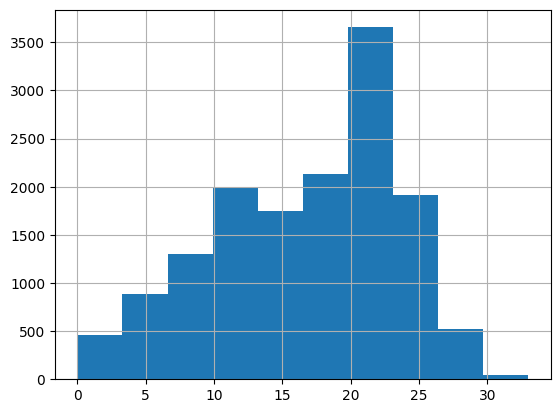

In [ ]:
df['clean_text'].str.split().map(lambda x : len(x)).hist()